This tutorial presents another example of solving ordinary differential equations using *odeint()*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

The differential equation that we will attempt to solve is:

$\ddot{z}=-\dfrac{1}{z}\left(\dot{z}^2+b\dot{z}+gz-gh\right)$.

In this expression, $z$ the height of water inside a straw with one end partially submerged in a cup of water.  Oscillations of the water level are induced by an initial pressure difference between the inside of the straw and the surface of the water in the cup (at one atmosphere).  For more details, see R. P. Smith and E. H. Matlis, *American Journal of Physics* **87**, 433 (2019).

> $g = 9.81~\mathrm{m}/\mathrm{s}^2$<br>
 $h$ is the depth that the straw is submerged in the water<br>
 $b$ is a drag coefficient

In [2]:
g = 9.81 # m/s^2
h = 0.10 # m
b = 0.25 # m/s

The strategy to solve a second-order differential equation using *odeint()* is to write the equation as a system of two first-order equations.  This is achieved by first writing $x[1] = \dot{z}$ and $x[0] = z$. In that case, or original second-order equation can be expressed as:

$\ddot{z}=\dot{x}[1]=-\dfrac{1}{x[0]}\left(x[1]^2+bx[1]+gx[0]-gh\right)$.

One of our first-order equations is the expression above and the other is simply $\dot{z}=x[1]$. 

- Now, we define a function that returns $\dot{z}$ and $\ddot{z}$ (in that order).

In [3]:
def z_derivatives(x, t):
    return [x[1], -(1/x[0])*(x[1]**2 + b*x[1] + g*x[0] - g*h)]

- Next, we create an array of the desired times for the solution.

In [4]:
time = np.arange(0, 3, 1e-3)

- Here is the call to *odeint()*.  This time we need to pass an array of initial conditions, the first is for $z(0)$ and the second is for $\dot{z}(0)$.  The .T is necessary so that we can separately unpack the solutions as $z(t)$ and $\dot{z}(t)$ (not intuitive, in my opinion).

In [5]:
position, velocity = odeint(z_derivatives, [2e-3, 0], time).T   

- A plot of the fluid height (position) inside the straw as a function of time.

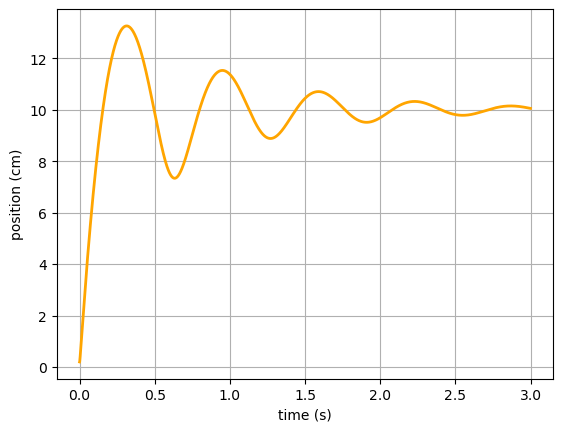

In [6]:
plt.plot(time, position*100, 'orange', linewidth = 2)
plt.xlabel('time (s)')
plt.ylabel('position (cm)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)

- A plot of the fluid velcoity as a function of time.

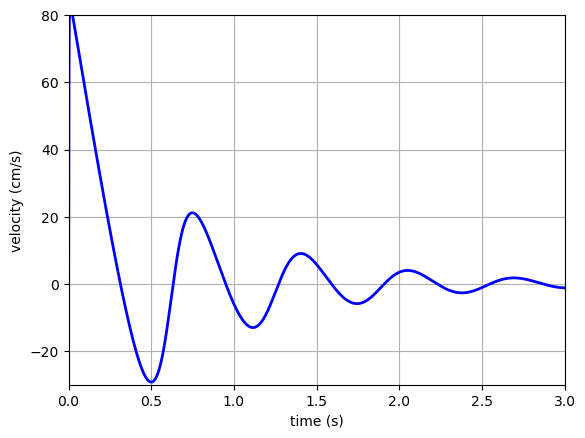

In [7]:
plt.plot(time, velocity*100, 'blue', linewidth = 2)
plt.xlabel('time (s)')
plt.ylabel('velocity (cm/s)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)
plt.axis((0, 3, -30, 80));

- We can call our function to access $\ddot{z}$ (the acceleration).  The _, is just a place holder for a variable that we're not going to use.  That part of the model returns $\dot{z}$, but we already have that solution from 'odeint'.

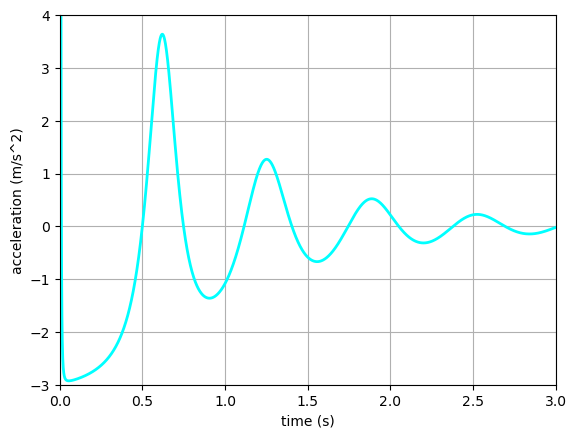

In [8]:
_, a = z_derivatives([position, velocity], time)
plt.plot(time, a, 'cyan', linewidth = 2)
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)
plt.axis((0, 3, -3, 4));